In [1]:
#EJECUTAR ESTE BLOQUE ANTES DE CUALQUIER OTRO DEL ARCHIVO

import pandas as pd
import datetime
import matplotlib.pyplot as plt

#Leemos el archivo y lo pasamos como diccionario
file = pd.read_csv('full_data.csv')
dataFile = file.to_dict('index')

#Guardamos todos los países en un set en mayúsculas
allCountries = set()

for key in dataFile:
    allCountries.add(dataFile[key]['location'].upper())

#Revisa que un país efectivamente exista.
def countryCheck(country):
    if country in allCountries:
        return True
    else:
        return False


#Convierte un string YYYY-mm-dd a formato date de datetime
def toDate(string):
    date = datetime.datetime.strptime(string, '%Y-%m-%d')
    return date

#Plotea un diccionario
def plotDict(dict, field, format, lbl):
    x = list()
    y = list()
    for keys in dict:
        x.append(keys)
        y.append(dict[keys][field])
    plt.plot(x, y, format, label = lbl)

2020-01-07 00:00:00
2020-01-08 00:00:00
2020-01-09 00:00:00
2020-01-10 00:00:00
2020-01-11 00:00:00
2020-01-12 00:00:00
2020-01-13 00:00:00
2020-01-14 00:00:00
2020-01-15 00:00:00
2020-01-16 00:00:00
2020-01-17 00:00:00
2020-01-18 00:00:00
2020-01-19 00:00:00
2020-01-20 00:00:00
2020-01-21 00:00:00
2020-01-22 00:00:00
2020-01-23 00:00:00
2020-01-24 00:00:00
2020-01-25 00:00:00
2020-01-26 00:00:00
2020-01-27 00:00:00
2020-01-28 00:00:00
2020-01-29 00:00:00
2020-01-30 00:00:00
2020-01-31 00:00:00
2020-02-01 00:00:00
2020-02-02 00:00:00
2020-02-03 00:00:00
2020-02-04 00:00:00
2020-02-05 00:00:00
2020-02-06 00:00:00
2020-02-07 00:00:00
2020-02-08 00:00:00
2020-02-09 00:00:00
2020-02-10 00:00:00
2020-02-11 00:00:00
2020-02-12 00:00:00
2020-02-13 00:00:00
2020-02-14 00:00:00
2020-02-15 00:00:00
2020-02-16 00:00:00
2020-02-17 00:00:00
2020-02-18 00:00:00
2020-02-19 00:00:00
2020-02-20 00:00:00
2020-02-21 00:00:00
2020-02-22 00:00:00
2020-02-23 00:00:00
2020-02-24 00:00:00
2020-02-25 00:00:00


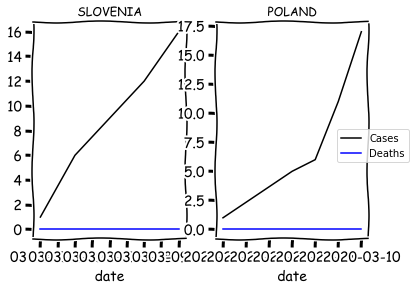

In [6]:
#Segundo item:
#   el usuario indica intervalo de tiempo
#   calcular intersecciones y marcar con un punto

startDate = toDate('2020-01-07')
endDate = toDate('2020-03-10')

#Arma un diccionario con la info de cada país en el intervalo de fechas solicitado
def countryCasesDeaths(input):
    countrydict = dict()
    for key in dataFile:
        if (dataFile[key]['location'].upper() == input) and (str(startDate) <= dataFile[key]['date'] <= str(endDate)):
            countrydict[key] = {
                'date' : toDate(dataFile[key]['date']),
                'total_cases' : int(dataFile[key]['total_cases']),
                'total_deaths' : int(dataFile[key]['total_deaths'])
             }
    return countrydict

bInput1 = str(input('Ingrese el país del que desea visualizar los contagios y fallecimientos totales:')).upper()
while countryCheck(bInput1) == False:
    bInput1= str(input('No encontramos el país introducido. Por favor intenta de nuevo')).upper()
bInput2 = str(input('Ingrese el país del que desea visualizar los contagios y fallecimientos totales:')).upper()
while countryCheck(bInput2) == False:
    bInput2= str(input('No encontramos el país introducido. Por favor intenta de nuevo')).upper()


bcountry1 = countryCasesDeaths(bInput1)
bcountry2 = countryCasesDeaths(bInput2)

#Imprimo las curvas en axes, para evitar el MatplotlibDeprecationWarning
with plt.xkcd():
    fig, (ax1, ax2) = plt.subplots(1,2)

def plotDict1(field, format, lbl):
    x = list()
    y = list()
    for keys in bcountry1:
        x.append(bcountry1[keys]['date'])
        y.append(bcountry1[keys][field])
    ax1.plot(x, y, format, label = lbl)
plotDict1('total_cases','k', 'Cases')
plotDict1('total_deaths', 'b', 'Deaths')
ax1.set_title(bInput1)
ax1.set_xlabel('date')
def plotDict2(field, format, lbl):
    x = list()
    y = list()
    for keys in bcountry2:
        x.append(bcountry2[keys]['date'])
        y.append(bcountry2[keys][field])
    ax2.plot(x, y, format, label = lbl)
plotDict2('total_cases','k', 'Cases')
plotDict2('total_deaths', 'b', 'Deaths')
ax2.set_title(bInput2)
ax2.set_xlabel('date')


def findJoint(country1, country2, field):
    #Armo diccionario con el país que tiene el índice más alto cada día
    leadcountry = dict()
    j = 0
    for i in country1:
        if country1[i][field] > country2[i][field]:
            leadcountry[j] = {'country' : 'country1', 'date' : i}
        elif country1[i][field] < country2[i][field]:
            leadcountry[j] = {'country' : 'country2', 'date' : i}
        else:
            leadcountry[j] = {'country' : 'tie', 'date' : i}
        j += 1
    #Armo diccionario con los puntos que coinciden
    joints = dict()
    for i in range(len(leadcountry)-1):
        if (leadcountry[i]['country'] != leadcountry[i+1]['country']) or (leadcountry[i]['country'] == 'tie'):
            joints[i] = {
                'date' : leadcountry[i]['date'],
                'value1': country1[leadcountry[i]['date']][field],
                'value2': country2[leadcountry[i]['date']][field]
            }
    #Imprime los puntos
    x = list()
    y1 = list()
    y2 = list()
    for i in joints:
        x.append(joints[i]['date'])
        y1.append(joints[i]['value1'])
        ax1.plot(x,y1, 'ro')
        y2.append(joints[i]['value2'])
        ax2.plot(x,y2, 'ro')

findJoint(bcountry1,bcountry2, 'total_cases')
findJoint(bcountry1,bcountry2, 'total_deaths')


#Agrego los labels
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

plt.show()
